In [1]:
# REDUCE THE PROBLEM TO 10 ASSESTS
# adterwards insert manualy the A array for both inequality constraints
# make sure each constrint recive only x value 
# run the function. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize 

In [3]:
df = pd.read_csv('data/all_stocks_5yr.csv')

## First exploring: 

In [4]:
print(df.shape)

df.head()

(619040, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
df.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [299]:
df['Name'].nunique()

505

In [443]:
N = 20

In [444]:
# Choosing the top 100 assets based on mean volume:
list_top_n_assets = df.groupby(['Name'])['volume'].mean().sort_values(ascending=False).head(N).reset_index()['Name'].tolist()


In [445]:
#list_top_10_assets

In [446]:
df_top_n = df[df['Name'].isin(list_top_n_assets)].reset_index(drop=True)

In [447]:
print(df_top_n.shape)
df_top_n.head()

(25180, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [448]:
# Verifing that the data contains only 100 assests: 
df_top_n['Name'].nunique()

20

In [449]:
# "AAL":{'beta':beta, 'return_stock':return value}

In [450]:
# adding a column that contain the mean per day to detemine the market close per this day. 
df_top_n['market_close']=df_top_n.groupby('date')['close'].transform('mean')

In [451]:
df_top_n

,date,open,high,low,close,volume,Name,market_close
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,26.058850
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,26.123710
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,26.147710
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,26.265395
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,26.338850
...,...,...,...,...,...,...,...,...
25175,2018-02-01,65.3700,66.0900,65.0600,65.5100,15717623,WFC,67.332000
25176,2018-02-02,65.3300,65.5254,63.8300,64.0700,18905283,WFC,66.017500
25177,2018-02-05,58.7000,59.8900,57.5000,58.1600,103394442,WFC,62.981000
25178,2018-02-06,56.9050,58.5000,55.8700,57.2800,83076895,WFC,64.988000


In [452]:
df_1 = df_top_n[['date','close','Name']]

In [453]:
df_2 = pd.DataFrame()
df_2 = df_top_n[['date','market_close']].drop_duplicates()
df_2['Name'] = 'market'
df_2.rename(columns={'market_close':'close'},inplace=True)

In [454]:
df_all = pd.concat([df_1,df_2])

In [455]:
df_all['Name'].nunique()

21

In [456]:
df_all.rename(columns={'Name':'name'},inplace=True)
df_all = df_all.reset_index(drop=True)
df_all = df_all[['date','name','close']]

In [457]:
data = df_all.pivot(index='date',columns='name',values='close')#.sort_values(by='date', ascending=False)

In [458]:
data

name,AAPL,AMD,BAC,C,CHK,CMCSA,CSCO,F,FB,FCX,...,INTC,JPM,MSFT,MU,NFLX,PFE,RF,T,WFC,market
date,,,,,,,,,,,,,,,,,,,,,
2013-02-08,67.8542,2.59,11.760,42.68,20.23,19.375,21.16,13.10,28.5450,35.64,...,21.00,48.63,27.55,7.75,25.8528,26.88,7.93,35.27,34.88,26.058850
2013-02-11,68.5614,2.67,11.860,43.15,20.05,19.320,21.27,13.11,28.2600,35.33,...,21.03,48.66,27.86,7.91,25.4128,27.14,7.94,35.23,35.26,26.123710
2013-02-12,66.8428,2.77,12.245,44.35,20.01,19.485,20.97,13.08,27.3700,35.67,...,21.19,49.14,27.88,7.92,25.4214,26.99,7.93,35.60,35.51,26.147710
2013-02-13,66.7156,2.75,12.170,44.00,20.57,20.065,21.14,13.04,27.9075,35.64,...,21.25,48.68,28.03,7.95,26.6098,27.00,7.85,35.42,35.13,26.265395
2013-02-14,66.6556,2.75,12.130,44.32,20.40,20.170,20.99,13.11,28.5000,35.53,...,21.23,49.22,28.04,8.08,26.7714,27.06,7.91,35.29,35.21,26.338850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,167.7800,13.25,32.500,79.20,3.46,41.890,41.70,10.92,193.0900,19.45,...,47.65,116.87,94.26,42.49,265.0700,36.83,19.54,39.16,65.51,67.332000
2018-02-02,160.5000,12.45,31.950,77.02,3.33,41.110,40.93,10.71,190.2800,17.97,...,46.15,114.28,91.78,40.82,267.4300,36.61,19.25,38.07,64.07,66.017500
2018-02-05,156.4900,11.57,30.260,73.27,3.09,39.200,38.78,10.24,181.2600,17.65,...,44.52,108.80,88.00,39.40,254.2600,34.67,18.46,36.63,58.16,62.981000


In [459]:
df_temp = data.reset_index(drop=False)

In [460]:
df_temp['date'] = pd.to_datetime(df_temp['date'])

In [461]:
df_resample = df_temp.resample("M", on='date').mean()

In [462]:
df_resample

name,AAPL,AMD,BAC,C,CHK,CMCSA,CSCO,F,FB,FCX,...,INTC,JPM,MSFT,MU,NFLX,PFE,RF,T,WFC,market
date,,,,,,,,,,,,,,,,,,,,,
2013-02-28,65.306264,2.641429,11.695357,42.983571,20.122857,19.982143,20.982714,12.768571,27.820536,33.696429,...,20.851429,48.709286,27.777500,7.975357,26.391607,27.220000,7.763571,35.490000,35.172857,25.924288
2013-03-31,63.120110,2.561000,12.186000,45.387500,20.853500,20.454000,21.333750,13.160500,26.806075,32.900000,...,21.478500,49.382500,28.139500,9.298750,26.384760,28.157000,8.181500,36.445500,36.866500,26.325072
2013-04-30,59.966432,2.510909,12.088636,45.089545,19.403182,20.640591,20.914182,13.108864,26.607864,30.614091,...,22.223636,48.196364,29.870000,9.486818,26.118627,30.055909,8.054091,37.830000,37.160909,26.130805
2013-05-31,63.778927,3.906364,13.130909,49.939091,20.564091,21.146341,22.385773,14.597727,26.143114,31.594545,...,24.111045,51.292273,33.950636,10.805273,31.959986,28.871364,8.942727,36.955455,39.226364,27.822509
2013-06-30,60.791120,4.006000,13.059500,49.322500,20.959000,20.109500,24.374300,15.401000,23.943700,29.237500,...,24.616000,53.252500,34.632000,13.141450,31.275410,28.369750,9.173500,35.434500,40.668500,27.764412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-31,157.817273,13.278636,26.549773,73.780000,3.911364,37.043636,33.855455,12.203636,173.306818,14.598636,...,40.594545,98.395000,77.939545,41.021818,194.277727,36.043182,15.203864,36.387064,55.019318,58.207194
2017-11-30,172.406190,11.270476,27.054762,72.806667,3.958095,36.382857,35.428571,12.180000,179.696667,14.200000,...,45.549048,99.457143,83.717619,45.670000,195.223333,35.488571,15.714286,34.283333,54.856667,59.715143
2017-12-31,171.891500,10.370000,29.218500,75.330500,3.813500,39.466000,38.084500,12.573000,177.416500,16.555500,...,44.976500,106.279000,84.758500,42.614500,187.854500,36.298500,17.142500,37.862000,59.785000,60.496625


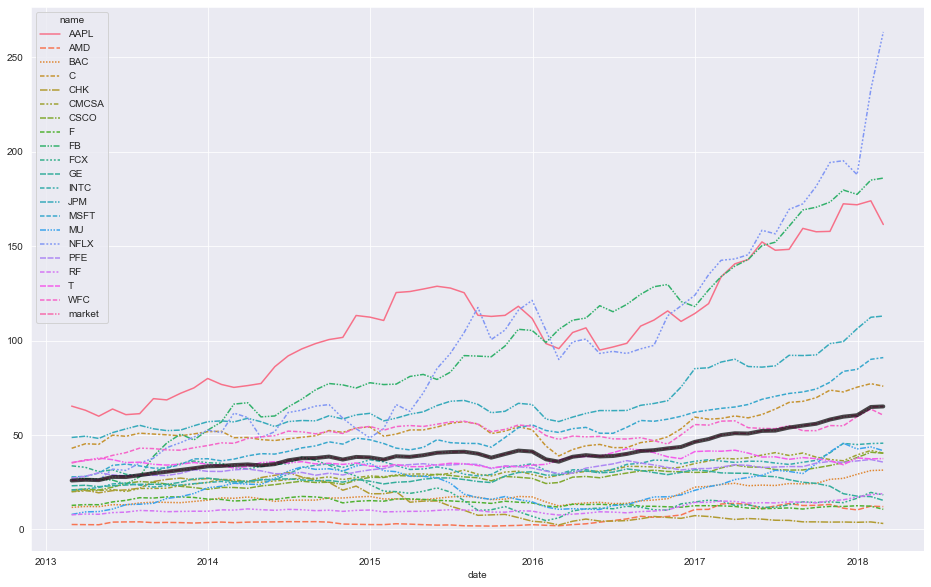

In [463]:
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(16, 10))
sns.lineplot(data =df_resample)
plt.plot(df_resample['market'] , marker='', color='black', linewidth=4, alpha=0.7)
plt.show()

In [464]:
# Monthly return:
returns = (df_resample/df_resample.shift())-1
#returns

In [465]:
# calculation for beta:
cov = returns.cov()
var = returns['market'].var()

In [466]:
# caluclating beta:
beta = cov/var

In [467]:
# only last row relevent: 
#beta

In [468]:
# Validating the beta using linear regression: 
# x=log_returns['market'].iloc[1:].to_numpy().reshape(-1,1)
# y=log_returns['ABBV'].iloc[1:].to_numpy().reshape(-1,1)

In [469]:
# linalg = LinearRegression()
# linalg.fit(x,y)
# linalg.coef_

In [470]:
df_beta = pd.DataFrame(beta.iloc[-1])

In [471]:
df_beta.reset_index(inplace=True)
df_beta = df_beta.rename(columns={'market':'beta'})

In [472]:
df_beta = df_beta.iloc[:N]

In [473]:
# determine the assets that are high voliatality: 
high_vol = df_beta[df_beta['beta']>1]['name'].tolist()

In [474]:
len(high_vol)

9

In [475]:
# determine the assets that are low voliatality: 
low_vol = df_beta[df_beta['beta']<=1]['name'].tolist()

In [476]:
len(low_vol)

11

In [477]:
# calculating the mean for each asset: 
df_means = pd.DataFrame(np.mean(returns, axis=0))
df_means.reset_index(inplace=True)
df_means = df_means.rename(columns={0:'mean_return'})
df_means = df_means.iloc[0:N]

In [478]:
df_means.head()

,name,mean_return
0,AAPL,0.016706
1,AMD,0.035151
2,BAC,0.018344
3,C,0.010716
4,CHK,-0.017325


In [479]:
# mean return:
mean_return = np.mean(returns, axis=0).values[0:N]

In [480]:
# cov return:
cov_returns=cov.values[0:N,0:N]

In [481]:
np.where(df_beta['beta']>1,1,0)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [482]:
np.where(df_beta['beta']<=1,1,0)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [483]:
df_beta['beta'].apply(lambda x: (0,1) if x<=1 else (0,0.1)).values

array([(0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1), (0, 1), (0, 1),
       (0, 1), (0, 1), (0, 0.1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0.1),
       (0, 0.1), (0, 1), (0, 0.1), (0, 1), (0, 1)], dtype=object)

$min(\gamma \displaystyle\sum_{i} \displaystyle\sum_{j} w_i\cdot w_j \cdot \sigma{_i}{_j} - (1- \gamma)\displaystyle\sum_{i} w_i\cdot \mu{_i})$
<br>$\textit{Subject to:}$
<br>$0.01\leq \displaystyle\sum_{i\in{LowVolatility}}w_i\leq 0.6 $
<br>$0.01\leq \displaystyle\sum_{i\in{HighVolatility}}w_j\leq 0.4 $
<br>$0\leq w_i\leq 1 , i\in{LowVolatility}$
<br>$0\leq w_j\leq 0.1 , j\in{HighVolatility}$
<br>$\displaystyle\sum_{i=1} ^{N} w_i =1$

In [484]:
np.sum(np.repeat(0.01, portfolio_size))

0.15

In [490]:
# Objective function:

def bi_function_optimization(mean_return,cov_return, gamma, portfolio_size):
    
    
    def f(x, mean_return, cov_return, gamma, portfolio_size):
        port_var = (x@cov_return)@x.T
        port_exp_return = np.array(mean_return)@x.T
        obj_func = gamma*port_var-(1-gamma)*port_exp_return
        return obj_func
    
    def constraint_eq(x):
        A=np.ones(x.shape)
        b=1
        constraintVal = np.matmul(A,x.T)-b 
        return constraintVal

    
    def constraint_ineq_upper_bound(x):
        A =[[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
            ,[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]]
        upper_bound = np.array([0.6,0.4]).T
        contraint_upper = upper_bound-(A@x.T)
        return contraint_upper

    def constraint_ineq_lower_bound(x):
        A =[[0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1]
            ,[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0]]
        lower_bound = np.array([0.01,0.01]).T
        contraint_lower = (A@x.T)-lower_bound 
        return contraint_lower

    x_init=np.random.dirichlet(np.ones(portfolio_size))
#     x_init = np.repeat(0.01, portfolio_size)
    cons = ({'type': 'eq', 'fun':constraint_eq},
        {'type':'ineq', 'fun': constraint_ineq_upper_bound},
        {'type':'ineq', 'fun': constraint_ineq_lower_bound})
    bnd = [(0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1), (0, 0.1), (0, 1), (0, 1),
       (0, 1), (0, 1), (0, 0.1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 0.1),
       (0, 0.1), (0, 1), (0, 0.1), (0, 1), (0, 1)]

    obj_func = optimize.minimize(f, 
                                x0=x_init,
                                args =(mean_return,cov_return, gamma, portfolio_size),
                                method='SLSQP',
                                bounds=bnd,
                                constraints=cons,
                                tol=10**-3)
    
    print(obj_func)
    return obj_func

In [491]:
portfolio_size = df_beta.shape[0]
#initialization
w_optimal =[]

for points in range(0,500):
    gama = points/500.0
    result = bi_function_optimization(mean_return, cov_returns, gama,portfolio_size)
    w_optimal.append(result.x)

     fun: -0.02985982604852528
     jac: array([-0.017, -0.035, -0.018, -0.011,  0.017, -0.013, -0.012,  0.002,
       -0.035, -0.   ,  0.006, -0.014, -0.015, -0.021, -0.033, -0.043,
       -0.005, -0.017, -0.002, -0.01 ])
 message: 'Optimization terminated successfully'
    nfev: 147
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.009, 0.1  , 0.044, 0.   , 0.   , 0.   , 0.   , 0.   , 0.342,
       0.   , 0.   , 0.01 , 0.025, 0.223, 0.1  , 0.1  , 0.   , 0.047,
       0.   , 0.   ])
     fun: -0.025244579171865195
     jac: array([-0.017, -0.035, -0.018, -0.011,  0.017, -0.012, -0.012,  0.002,
       -0.034, -0.   ,  0.006, -0.014, -0.015, -0.021, -0.033, -0.043,
       -0.005, -0.017, -0.002, -0.01 ])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.071, 0.1  , 0.02 , 0.   , 0.   , 0.039, 0.027, 0.   , 0.167,
       0.   , 0.   , 0.031, 0.14 , 0.129, 0.1  , 0.1  , 0.   , 0.009,
    

     fun: -0.02480210090654245
     jac: array([-0.016, -0.033, -0.017, -0.01 ,  0.017, -0.012, -0.011,  0.002,
       -0.032, -0.   ,  0.005, -0.014, -0.014, -0.02 , -0.03 , -0.041,
       -0.005, -0.016, -0.001, -0.009])
 message: 'Optimization terminated successfully'
    nfev: 126
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.017, 0.1  , 0.02 , 0.004, 0.   , 0.   , 0.   , 0.   , 0.213,
       0.   , 0.   , 0.062, 0.237, 0.087, 0.1  , 0.1  , 0.001, 0.059,
       0.   , 0.   ])
     fun: -0.02911901761577516
     jac: array([-0.016, -0.033, -0.017, -0.01 ,  0.017, -0.012, -0.011,  0.002,
       -0.032, -0.   ,  0.005, -0.014, -0.014, -0.02 , -0.03 , -0.041,
       -0.005, -0.016, -0.001, -0.009])
 message: 'Optimization terminated successfully'
    nfev: 147
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.041, 0.1  , 0.017, 0.   , 0.   , 0.   , 0.   , 0.   , 0.44 ,
       0.   , 0.   , 0.021, 0.022, 0.118, 0.1  , 0.1  , 0.   , 0.042,
    

     fun: -0.02718894196188706
     jac: array([-0.015, -0.031, -0.016, -0.009,  0.016, -0.011, -0.01 ,  0.002,
       -0.03 ,  0.   ,  0.005, -0.013, -0.013, -0.018, -0.029, -0.038,
       -0.004, -0.015, -0.001, -0.009])
 message: 'Optimization terminated successfully'
    nfev: 168
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.039, 0.1  , 0.054, 0.   , 0.   , 0.   , 0.   , 0.   , 0.398,
       0.   , 0.   , 0.   , 0.   , 0.202, 0.1  , 0.1  , 0.   , 0.007,
       0.   , 0.   ])
     fun: -0.022692254903302674
     jac: array([-0.015, -0.03 , -0.016, -0.009,  0.016, -0.011, -0.01 ,  0.002,
       -0.03 ,  0.   ,  0.005, -0.013, -0.013, -0.018, -0.028, -0.038,
       -0.004, -0.015, -0.001, -0.009])
 message: 'Optimization terminated successfully'
    nfev: 105
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.018, 0.1  , 0.07 , 0.   , 0.   , 0.134, 0.   , 0.   , 0.131,
       0.   , 0.   , 0.004, 0.003, 0.306, 0.1  , 0.1  , 0.   , 0.012,
   

     fun: -0.02465361060444411
     jac: array([-0.013, -0.028, -0.015, -0.008,  0.015, -0.01 , -0.01 ,  0.002,
       -0.028,  0.   ,  0.005, -0.012, -0.012, -0.017, -0.026, -0.035,
       -0.004, -0.013, -0.001, -0.008])
 message: 'Optimization terminated successfully'
    nfev: 147
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([0.002, 0.1  , 0.037, 0.007, 0.   , 0.   , 0.   , 0.   , 0.392,
       0.   , 0.   , 0.026, 0.062, 0.119, 0.1  , 0.1  , 0.   , 0.054,
       0.   , 0.001])
     fun: -0.024395900064585786
     jac: array([-0.013, -0.028, -0.015, -0.008,  0.015, -0.01 , -0.01 ,  0.002,
       -0.028,  0.   ,  0.005, -0.012, -0.012, -0.017, -0.026, -0.035,
       -0.004, -0.013, -0.001, -0.008])
 message: 'Optimization terminated successfully'
    nfev: 168
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([0.06 , 0.1  , 0.036, 0.   , 0.   , 0.   , 0.046, 0.   , 0.395,
       0.   , 0.   , 0.001, 0.055, 0.094, 0.1  , 0.1  , 0.   , 0.004,
   

     fun: -0.02184625954551989
     jac: array([-0.012, -0.025, -0.013, -0.008,  0.015, -0.009, -0.009,  0.002,
       -0.026,  0.001,  0.005, -0.011, -0.011, -0.016, -0.024, -0.032,
       -0.004, -0.012, -0.001, -0.007])
 message: 'Optimization terminated successfully'
    nfev: 126
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.051, 0.1  , 0.003, 0.   , 0.   , 0.042, 0.   , 0.   , 0.363,
       0.   , 0.   , 0.021, 0.043, 0.092, 0.1  , 0.1  , 0.014, 0.046,
       0.   , 0.024])
     fun: -0.018135506761046718
     jac: array([-0.012, -0.025, -0.013, -0.008,  0.015, -0.009, -0.009,  0.002,
       -0.026,  0.001,  0.005, -0.011, -0.011, -0.015, -0.024, -0.032,
       -0.004, -0.012, -0.001, -0.007])
 message: 'Optimization terminated successfully'
    nfev: 105
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.07 , 0.1  , 0.   , 0.033, 0.   , 0.022, 0.066, 0.   , 0.138,
       0.   , 0.   , 0.076, 0.047, 0.142, 0.097, 0.1  , 0.   , 0.   ,
   

     fun: -0.018946138314631926
     jac: array([-0.012, -0.024, -0.013, -0.007,  0.014, -0.009, -0.008,  0.002,
       -0.025,  0.001,  0.004, -0.01 , -0.01 , -0.015, -0.023, -0.03 ,
       -0.004, -0.012, -0.001, -0.007])
 message: 'Optimization terminated successfully'
    nfev: 126
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.058, 0.1  , 0.042, 0.   , 0.   , 0.012, 0.122, 0.   , 0.246,
       0.   , 0.   , 0.051, 0.049, 0.082, 0.1  , 0.1  , 0.   , 0.   ,
       0.   , 0.037])
     fun: -0.018847700813249026
     jac: array([-0.012, -0.024, -0.013, -0.007,  0.014, -0.009, -0.008,  0.002,
       -0.024,  0.001,  0.004, -0.01 , -0.01 , -0.015, -0.023, -0.03 ,
       -0.004, -0.012, -0.001, -0.007])
 message: 'Optimization terminated successfully'
    nfev: 126
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.032, 0.1  , 0.059, 0.   , 0.   , 0.012, 0.025, 0.   , 0.256,
       0.   , 0.   , 0.027, 0.055, 0.115, 0.1  , 0.1  , 0.093, 0.009,
  

     fun: -0.019305319913307185
     jac: array([-0.011, -0.023, -0.012, -0.007,  0.014, -0.008, -0.008,  0.002,
       -0.023,  0.001,  0.004, -0.01 , -0.01 , -0.014, -0.021, -0.029,
       -0.003, -0.011, -0.001, -0.006])
 message: 'Optimization terminated successfully'
    nfev: 105
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.05 , 0.09 , 0.06 , 0.   , 0.   , 0.004, 0.021, 0.   , 0.335,
       0.   , 0.   , 0.07 , 0.064, 0.091, 0.1  , 0.1  , 0.   , 0.   ,
       0.016, 0.   ])
     fun: -0.016261539108970033
     jac: array([-0.011, -0.022, -0.012, -0.007,  0.014, -0.008, -0.008,  0.002,
       -0.024,  0.001,  0.004, -0.01 , -0.01 , -0.014, -0.021, -0.029,
       -0.003, -0.011, -0.001, -0.006])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.002, 0.1  , 0.09 , 0.013, 0.   , 0.051, 0.019, 0.   , 0.141,
       0.   , 0.   , 0.033, 0.08 , 0.167, 0.065, 0.1  , 0.043, 0.029,
   

     fun: -0.01385054842034158
     jac: array([-0.01 , -0.02 , -0.011, -0.006,  0.014, -0.008, -0.007,  0.002,
       -0.022,  0.002,  0.004, -0.009, -0.009, -0.013, -0.02 , -0.027,
       -0.003, -0.01 , -0.001, -0.006])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.005, 0.1  , 0.018, 0.036, 0.   , 0.119, 0.019, 0.   , 0.11 ,
       0.026, 0.   , 0.133, 0.038, 0.05 , 0.1  , 0.1  , 0.039, 0.016,
       0.066, 0.026])
     fun: -0.015690845103438624
     jac: array([-0.01 , -0.02 , -0.011, -0.006,  0.013, -0.008, -0.007,  0.002,
       -0.022,  0.001,  0.004, -0.009, -0.009, -0.013, -0.02 , -0.027,
       -0.003, -0.01 , -0.001, -0.006])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.008, 0.1  , 0.01 , 0.034, 0.   , 0.082, 0.065, 0.019, 0.181,
       0.   , 0.   , 0.079, 0.059, 0.084, 0.1  , 0.1  , 0.   , 0.049,
     

     fun: -0.013587882585575408
     jac: array([-0.01 , -0.019, -0.01 , -0.006,  0.013, -0.007, -0.007,  0.002,
       -0.021,  0.002,  0.004, -0.008, -0.008, -0.012, -0.018, -0.025,
       -0.003, -0.009, -0.001, -0.005])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.012, 0.1  , 0.055, 0.   , 0.   , 0.023, 0.138, 0.   , 0.085,
       0.002, 0.   , 0.2  , 0.052, 0.057, 0.1  , 0.1  , 0.025, 0.031,
       0.   , 0.02 ])
     fun: -0.014554185219389549
     jac: array([-0.01 , -0.019, -0.01 , -0.006,  0.013, -0.007, -0.007,  0.002,
       -0.021,  0.001,  0.004, -0.008, -0.008, -0.012, -0.019, -0.025,
       -0.003, -0.009, -0.001, -0.005])
 message: 'Optimization terminated successfully'
    nfev: 105
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.016, 0.1  , 0.023, 0.   , 0.   , 0.103, 0.056, 0.   , 0.113,
       0.   , 0.   , 0.02 , 0.024, 0.239, 0.086, 0.1  , 0.017, 0.075,
   

     fun: -0.010577391584479246
     jac: array([-0.009, -0.018, -0.009, -0.005,  0.013, -0.007, -0.006,  0.002,
       -0.019,  0.002,  0.004, -0.008, -0.008, -0.011, -0.017, -0.023,
       -0.003, -0.009, -0.001, -0.005])
 message: 'Optimization terminated successfully'
    nfev: 63
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.079, 0.048, 0.089, 0.   , 0.   , 0.053, 0.113, 0.052, 0.1  ,
       0.   , 0.029, 0.03 , 0.027, 0.035, 0.09 , 0.093, 0.   , 0.001,
       0.088, 0.074])
     fun: -0.010706268564072413
     jac: array([-0.009, -0.017, -0.009, -0.005,  0.012, -0.007, -0.006,  0.002,
       -0.019,  0.001,  0.004, -0.008, -0.008, -0.011, -0.017, -0.023,
       -0.003, -0.008, -0.001, -0.005])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.09 , 0.061, 0.027, 0.075, 0.   , 0.018, 0.018, 0.   , 0.085,
       0.   , 0.   , 0.074, 0.044, 0.088, 0.05 , 0.096, 0.092, 0.   ,
    

     fun: -0.011191821876230567
     jac: array([-0.008, -0.015, -0.008, -0.004,  0.012, -0.006, -0.005,  0.002,
       -0.018,  0.002,  0.004, -0.007, -0.007, -0.01 , -0.015, -0.021,
       -0.002, -0.007, -0.001, -0.004])
 message: 'Optimization terminated successfully'
    nfev: 105
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.018, 0.091, 0.029, 0.009, 0.   , 0.033, 0.068, 0.   , 0.106,
       0.   , 0.   , 0.082, 0.044, 0.065, 0.085, 0.1  , 0.   , 0.068,
       0.   , 0.203])
     fun: -0.008081994041834446
     jac: array([-0.008, -0.016, -0.008, -0.004,  0.012, -0.006, -0.006,  0.002,
       -0.018,  0.003,  0.004, -0.007, -0.007, -0.01 , -0.016, -0.022,
       -0.002, -0.008, -0.001, -0.004])
 message: 'Optimization terminated successfully'
    nfev: 42
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.035, 0.04 , 0.1  , 0.1  , 0.   , 0.05 , 0.021, 0.027, 0.088,
       0.047, 0.012, 0.09 , 0.058, 0.085, 0.023, 0.042, 0.087, 0.013,
   

     fun: -0.008402534636067438
     jac: array([-0.007, -0.013, -0.007, -0.004,  0.011, -0.005, -0.005,  0.002,
       -0.016,  0.002,  0.003, -0.006, -0.006, -0.009, -0.013, -0.018,
       -0.002, -0.006, -0.001, -0.004])
 message: 'Optimization terminated successfully'
    nfev: 84
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.09 , 0.068, 0.029, 0.018, 0.   , 0.009, 0.098, 0.093, 0.069,
       0.   , 0.   , 0.032, 0.117, 0.07 , 0.062, 0.1  , 0.111, 0.032,
       0.   , 0.001])
     fun: -0.007853837313342523
     jac: array([-0.007, -0.012, -0.007, -0.004,  0.011, -0.005, -0.005,  0.002,
       -0.016,  0.003,  0.003, -0.006, -0.006, -0.009, -0.013, -0.019,
       -0.002, -0.006, -0.   , -0.004])
 message: 'Optimization terminated successfully'
    nfev: 63
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.019, 0.1  , 0.041, 0.005, 0.003, 0.028, 0.055, 0.001, 0.089,
       0.016, 0.   , 0.093, 0.059, 0.02 , 0.042, 0.075, 0.033, 0.1  ,
    

     fun: -0.003831596689578059
     jac: array([-0.005, -0.009, -0.005, -0.002,  0.013, -0.004, -0.003,  0.002,
       -0.013,  0.004,  0.003, -0.004, -0.004, -0.007, -0.009, -0.014,
       -0.001, -0.004, -0.   , -0.002])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.006, 0.019, 0.099, 0.045, 0.081, 0.017, 0.126, 0.049, 0.019,
       0.011, 0.027, 0.03 , 0.015, 0.056, 0.065, 0.062, 0.025, 0.011,
       0.025, 0.211])
     fun: -0.0049551152027831795
     jac: array([-0.005, -0.01 , -0.005, -0.003,  0.011, -0.004, -0.003,  0.002,
       -0.013,  0.003,  0.003, -0.004, -0.005, -0.007, -0.01 , -0.015,
       -0.001, -0.005, -0.   , -0.003])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.1  , 0.021, 0.075, 0.01 , 0.04 , 0.005, 0.022, 0.06 , 0.045,
       0.002, 0.002, 0.139, 0.019, 0.112, 0.038, 0.052, 0.006, 0.063,
   

     fun: -0.003296168636849235
     jac: array([-0.003, -0.005, -0.003, -0.001,  0.01 , -0.002, -0.002,  0.002,
       -0.007,  0.006,  0.002, -0.002, -0.002, -0.004, -0.005, -0.009,
       -0.001, -0.002, -0.   , -0.001])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.024, 0.024, 0.1  , 0.024, 0.004, 0.085, 0.066, 0.075, 0.174,
       0.087, 0.021, 0.032, 0.021, 0.034, 0.089, 0.02 , 0.016, 0.028,
       0.038, 0.039])
     fun: -0.0023900790050482923
     jac: array([-0.003, -0.005, -0.002, -0.001,  0.009, -0.002, -0.002,  0.002,
       -0.008,  0.004,  0.003, -0.003, -0.002, -0.004, -0.006, -0.009,
       -0.001, -0.002,  0.   , -0.001])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.019, 0.021, 0.079, 0.051, 0.   , 0.   , 0.017, 0.009, 0.057,
       0.05 , 0.187, 0.003, 0.026, 0.049, 0.009, 0.089, 0.166, 0.081,
   

       0.159, 0.013])
     fun: -0.000886491816836253
     jac: array([-0.001,  0.   ,  0.001,  0.001,  0.008, -0.001, -0.   ,  0.002,
       -0.004,  0.004,  0.002, -0.001, -0.   , -0.001, -0.001, -0.003,
       -0.   ,  0.001,  0.   ,  0.001])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.035, 0.005, 0.025, 0.097, 0.031, 0.036, 0.03 , 0.033, 0.074,
       0.   , 0.048, 0.014, 0.041, 0.074, 0.055, 0.055, 0.029, 0.098,
       0.032, 0.19 ])
     fun: -0.0008475869397739774
     jac: array([-0.   ,  0.002, -0.   ,  0.001,  0.009, -0.   ,  0.   ,  0.003,
       -0.003,  0.006,  0.002,  0.   , -0.   , -0.001, -0.   , -0.003,
        0.   ,  0.   ,  0.   ,  0.   ])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.019, 0.077, 0.017, 0.046, 0.026, 0.215, 0.01 , 0.052, 0.133,
       0.058, 0.   , 0.112, 0.   , 0.   , 0.1  , 0.

     fun: 0.0017699287213979705
     jac: array([0.002, 0.006, 0.003, 0.002, 0.01 , 0.001, 0.002, 0.003, 0.   ,
       0.009, 0.002, 0.002, 0.002, 0.001, 0.005, 0.002, 0.001, 0.003,
       0.001, 0.002])
 message: 'Optimization terminated successfully'
    nfev: 22
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([0.1  , 0.008, 0.029, 0.004, 0.04 , 0.036, 0.073, 0.153, 0.022,
       0.095, 0.022, 0.024, 0.029, 0.018, 0.085, 0.031, 0.04 , 0.007,
       0.015, 0.168])


In [492]:
mean_return

array([ 0.017,  0.035,  0.018,  0.011, -0.017,  0.013,  0.012, -0.002,
        0.035,  0.   , -0.006,  0.014,  0.015,  0.021,  0.033,  0.043,
        0.005,  0.017,  0.002,  0.01 ])

In [493]:
min_risk_point = []
exp_portfolio_return_point =[]
w_optimal_array = np.array(w_optimal)

min_risk_point = np.diagonal((w_optimal_array@cov_returns)@w_optimal_array.T)
# trading days = 251: 

# expected risk -> beta
expected_risk = np.sqrt(min_risk_point*12)

expected_protfolio_return = w_optimal_array@mean_return
expected_return = 12*np.array(expected_protfolio_return)

np.set_printoptions(precision=3, suppress=True)
print("Optimal weights of the efficient set portfolios:\n",w_optimal_array)
print("Annualized risk and return of the efficient set portfolios:\n", np.c_[expected_risk,expected_return])

Optimal weights of the efficient set portfolios:
 [[0.009 0.1   0.044 ... 0.047 0.    0.   ]
 [0.071 0.1   0.02  ... 0.009 0.    0.066]
 [0.005 0.1   0.08  ... 0.013 0.    0.   ]
 ...
 [0.028 0.    0.085 ... 0.086 0.043 0.063]
 [0.019 0.073 0.024 ... 0.047 0.053 0.046]
 [0.1   0.008 0.029 ... 0.007 0.015 0.168]]
Annualized risk and return of the efficient set portfolios:
 [[0.144 0.358]
 [0.134 0.304]
 [0.147 0.353]
 [0.159 0.38 ]
 [0.152 0.369]
 [0.166 0.388]
 [0.139 0.336]
 [0.137 0.297]
 [0.143 0.346]
 [0.155 0.373]
 [0.136 0.311]
 [0.138 0.33 ]
 [0.164 0.387]
 [0.143 0.337]
 [0.154 0.374]
 [0.136 0.319]
 [0.136 0.3  ]
 [0.141 0.344]
 [0.138 0.336]
 [0.15  0.367]
 [0.139 0.323]
 [0.16  0.383]
 [0.14  0.336]
 [0.144 0.345]
 [0.159 0.378]
 [0.136 0.317]
 [0.136 0.315]
 [0.131 0.3  ]
 [0.157 0.379]
 [0.14  0.317]
 [0.155 0.373]
 [0.143 0.345]
 [0.161 0.38 ]
 [0.165 0.387]
 [0.136 0.33 ]
 [0.136 0.292]
 [0.159 0.381]
 [0.135 0.316]
 [0.155 0.372]
 [0.14  0.337]
 [0.167 0.386]
 [0.138 0.

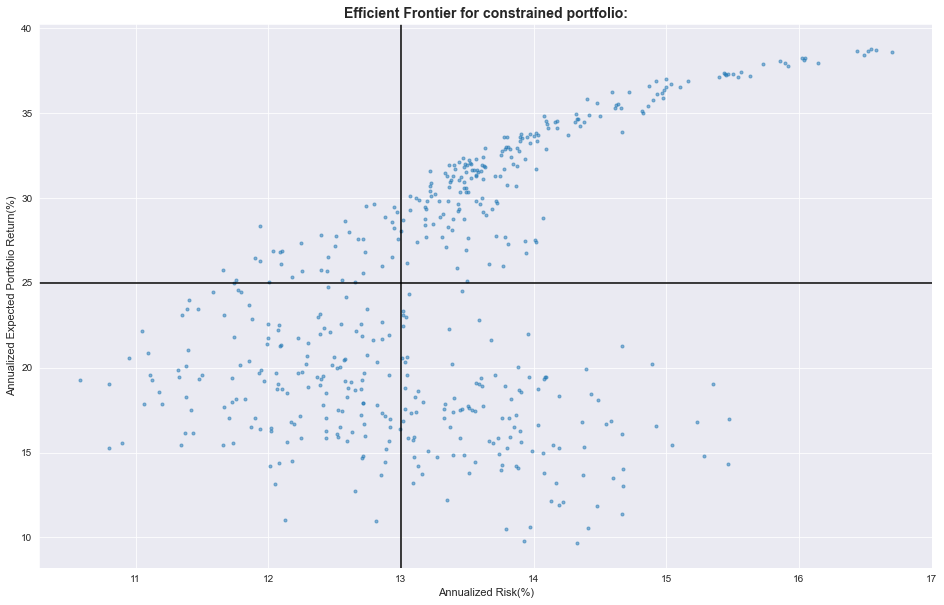

In [494]:
no_points = expected_return.size

area = np.pi*3
plt.figure(figsize=(16, 10))
plt.title("Efficient Frontier for constrained portfolio:", size=14, fontweight='bold')
plt.xlabel("Annualized Risk(%)", size=11)
plt.ylabel("Annualized Expected Portfolio Return(%)", size=11)
plt.scatter(expected_risk*100, expected_return*100, s=area, alpha =0.5)
plt.axhline(25, color='black')
plt.axvline(13, color='black')
plt.show()

In [503]:
for i in range(len(expected_risk)):
    for j in range(i+1,len(expected_risk)):
        if expected_risk[i]-expected_risk[j]==0:
            print("OMG")

In [504]:
for i in range(len(expected_return)):
    for j in range(i+1,len(expected_return)):
        if expected_return[i]-expected_return[j]==0:
            print("OMG")

In [495]:
w_random=np.random.dirichlet(np.ones(portfolio_size))
def f(x, mean_return, cov_return, gamma, portfolio_size):
    port_var = (x@cov_return)@x.T
    port_exp_return = np.array(mean_return)@x.T
    obj_func = gamma*port_var-(1-gamma)*port_exp_return
    return obj_func

In [293]:
f(w_random,mean_return,cov_returns,0.3,portfolio_size)

-0.011522412947127338

In [ ]:
min_risk_point = []
exp_portfolio_return_point =[]
w_optimal_array = np.array(w_optimal)

min_risk_point = np.diagonal((w_optimal_array@cov_returns)@w_optimal_array.T)
# trading days = 251: 

# expected risk -> beta
expected_risk = np.sqrt(min_risk_point*12)

expected_protfolio_return = w_optimal_array@mean_return
expected_return = 12*np.array(expected_protfolio_return)

np.set_printoptions(precision=3, suppress=True)
print("Optimal weights of the efficient set portfolios:\n",w_optimal_array)
print("Annualized risk and return of the efficient set portfolios:\n", np.c_[expected_risk,expected_return])

In [136]:
#list_top_n_assets

In [137]:
w_array=[]
for j in i:
    w_array.append(w_optimal_array[j])

In [170]:
df_stack_bar = pd.DataFrame(w_array).T

In [175]:
df_new = df_stack_bar.rename(columns={1:0.2, 2:0.4, 3:0.6, 4:0.8, 5:1 })
df_new.index = list_top_n_assets
df_new = df_new.T
df_new = df_new.reset_index()

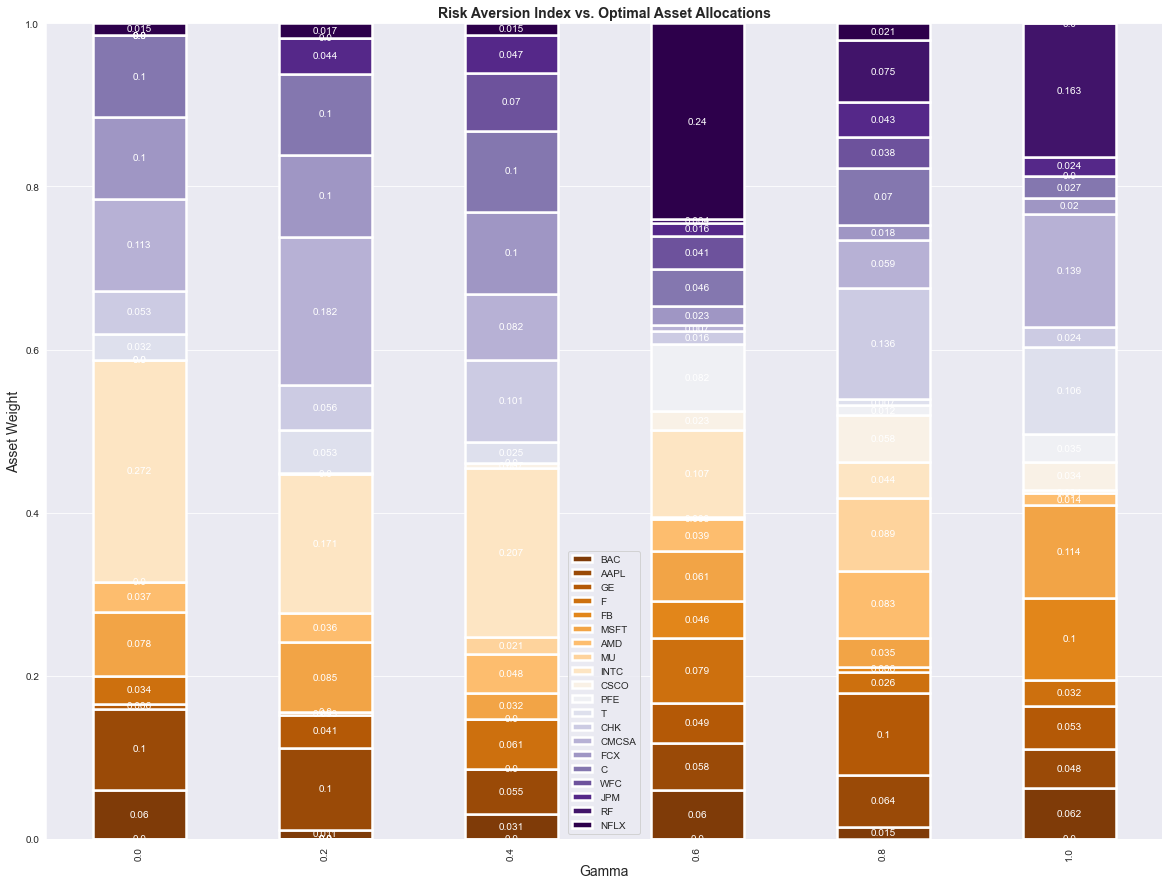

In [226]:
ax = df_new.plot.bar(x='index', stacked=True, 
                cmap='PuOr',
                linewidth=2.5,
                figsize=(20,15))
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = round(height,3)
    label_x = round(x + width / 2,3)
    label_y = round(y + height / 2,3)
    ax.text(label_x, label_y, label_text, ha='center',    
            va='center', color='w')
plt.xlabel("Gamma", fontsize=14)
plt.ylabel("Asset Weight", fontsize=14)
plt.title('Risk Aversion Index vs. Optimal Asset Allocations', fontsize=14, fontweight='bold')

plt.show()

In [223]:
df_beta

,name,beta
0,AAPL,1.169863
1,AMD,2.265606
2,BAC,1.363927
3,C,1.182528
4,CHK,2.730374
5,CMCSA,0.614953
6,CSCO,0.757347
7,F,0.947021
8,FB,0.653931
9,FCX,2.187166


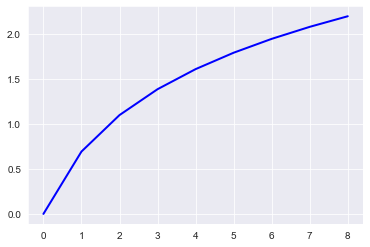

In [92]:
from matplotlib import pyplot

a = [ np.log(i) for i in range(1,10) ]

pyplot.plot(a, color='blue', lw=2)
pyplot.show()